### Projeto - Analise da Cota Parlamentar

Utilizando dados disponibilizados pela [Câmara dos Deputados](http://www2.camara.leg.br/transparencia/cota-para-exercicio-da-atividade-parlamentar/dados-abertos-cota-parlamentar)

Iremos analisar os dados de 2009 à 2017.

A atividade será divida em duas partes:

__1ª parte:__

Fazendo uso de gráficos, tabelas e/ou métricas estatísticas, responder as seguintes questões:
- a. Como se comportam os gastos com cotas parlamentares ao longo do tempo? Existe alguma tendência de aumento ou redução desse custo? Existe sazonalidade?
- b. Quais foram os parlamentares que mais consumiram recursos durante o mandato 2011-2014? E quais foram os que menos consumiram recursos?
- c. Quais são as categorias de despesas mais onerosas dentre os recursos destinados às cotas parlamentares?
- d. Qual é o custo per capita de um parlamentar em cada unidade da federação? (considerando somente as despesas de cota parlamentar)

__2ª parte:__

Essa parte é livre, ficando a cargo do candidato realizar análises e responder suas próprias questões.
Neste caso, responderei as seguintes questões:
- a. Qual partido mais consumiu recursos ?
- b. Qual candidato gastou mais em combustível no período x ?


### Etapas do projeto:

- Leitura dos arquivos
- Analise superficial dos dados
- Limpeza do DataFrame
- Analise e resposta das questões levantadas
- Conclusão
- Limitações

### Etapa 1 - Leitura dos arquivos

In [1]:
# Importando as bibliotecas que serão utilizadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Os dados estão separados em arquivos por _ANO_ iremos utilizar um laço de repetição for para carregar todos os arquivos e adiciona-los a um unico dataframe, iremos também filtrar as colunas carregadas para ignorar as que não serão uteis em nossas analises. A descrição das colunas pode ser vista [aqui](http://www2.camara.leg.br/transparencia/cota-para-exercicio-da-atividade-parlamentar/explicacoes-sobre-o-formato-dos-arquivos-xml)

In [2]:
# Colunas que serão utilizadas
colunas = [0,4,5,8,9,10,11,15,18,19,20,22,23]

In [3]:
# Carregando um arquivo para teste

df_temp = pd.read_csv('Ano-2009.csv', sep=';', usecols=colunas)
df_temp['ano'] = [2009 for _ in range(len(df_temp))]
df_temp2 = pd.read_csv('Ano-2010.csv', sep=';', usecols=colunas)
df_temp2['ano'] = [2010 for _ in range(len(df_temp2))]

dfs = [df_temp,df_temp2]
df_temps = pd.concat(dfs, ignore_index=True)

In [4]:
df_temps.head()

,txNomeParlamentar,sgUF,sgPartido,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,datEmissao,vlrLiquido,numMes,numAno,txtPassageiro,txtTrecho,ano
0,ABELARDO CAMARINHA,SP,PSB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,TIM CELULAR S/A,2009-05-19 00:00:00,"411,51",5,2009,NaN,NaN,2009
1,ABELARDO CAMARINHA,SP,PSB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,TIM CELULAR S/A,2009-05-19 00:00:00,"429,09",5,2009,NaN,NaN,2009
2,ABELARDO CAMARINHA,SP,PSB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,TIM CELULAR S/A,2009-05-19 00:00:00,"109,79",5,2009,NaN,NaN,2009
3,ABELARDO CAMARINHA,SP,PSB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,TIM CELULAR S/A,2009-05-19 00:00:00,"68,14",5,2009,NaN,NaN,2009
4,ABELARDO CAMARINHA,SP,PSB,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,AUTO POSTO ALVORADA,2009-09-25 00:00:00,"4395,36",9,2009,NaN,NaN,2009


In [5]:
# Utilizando for para carregar os dados dos arquivos

ano = 2009
df = []
for conta in range(9):
    df_temp = pd.read_csv('Ano-{}.csv'.format(ano), sep=';', usecols=colunas)
    df.append(df_temp)
    ano += 1

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df_cotas = pd.concat(df, ignore_index=False)

In [7]:
df_cotas.head()

,txNomeParlamentar,sgUF,sgPartido,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,datEmissao,vlrLiquido,numMes,numAno,txtPassageiro,txtTrecho
0,ABELARDO CAMARINHA,SP,PSB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,TIM CELULAR S/A,2009-05-19 00:00:00,"411,51",5,2009,NaN,NaN
1,ABELARDO CAMARINHA,SP,PSB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,TIM CELULAR S/A,2009-05-19 00:00:00,"429,09",5,2009,NaN,NaN
2,ABELARDO CAMARINHA,SP,PSB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,TIM CELULAR S/A,2009-05-19 00:00:00,"109,79",5,2009,NaN,NaN
3,ABELARDO CAMARINHA,SP,PSB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,TIM CELULAR S/A,2009-05-19 00:00:00,"68,14",5,2009,NaN,NaN
4,ABELARDO CAMARINHA,SP,PSB,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,AUTO POSTO ALVORADA,2009-09-25 00:00:00,"4395,36",9,2009,NaN,NaN


In [8]:
df_cotas.shape

(3105148, 13)

In [9]:
df_cotas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3105148 entries, 0 to 341512
Data columns (total 13 columns):
txNomeParlamentar            object
sgUF                         object
sgPartido                    object
txtDescricao                 object
numEspecificacaoSubCota      int64
txtDescricaoEspecificacao    object
txtFornecedor                object
datEmissao                   object
vlrLiquido                   object
numMes                       int64
numAno                       int64
txtPassageiro                object
txtTrecho                    object
dtypes: int64(3), object(10)
memory usage: 331.7+ MB


Ao analisar a tipagem das colunas, podemos observar que _datEmissao_ não esta no formato datetime e portanto teremos que converter e também a coluna _vlrLiquido_ não esta no formato float.

#### Conversão da coluna datEmissao
Como temos a coluna que indica o MES e ANO, iremos converter a coluna datEmissao para apresentar o DIA

In [10]:
dia = df_cotas['datEmissao'].str[8:10] #pegando valor da posição 8 até 10, sendo o ultimo exclusivo
dia.head()

0    19
1    19
2    19
3    19
4    25
Name: datEmissao, dtype: object

In [11]:
df_cotas['datEmissao'] = dia

In [12]:
df_cotas.rename(columns={'datEmissao':'numDia'}, inplace=True)

In [13]:
df_cotas.columns

Index(['txNomeParlamentar', 'sgUF', 'sgPartido', 'txtDescricao',
       'numEspecificacaoSubCota', 'txtDescricaoEspecificacao', 'txtFornecedor',
       'numDia', 'vlrLiquido', 'numMes', 'numAno', 'txtPassageiro',
       'txtTrecho'],
      dtype='object')

#### Conversão da coluna vlrLiquido
Iremos converter a coluna para float

In [14]:
valor = df_cotas['vlrLiquido'] #carregando os dados da coluna em uma variavel para conversão
valor = valor.str.replace(",",".").astype(float) #trocando a , por . e convertendo para float
valor.head() #conferindo a conversão

0     411.51
1     429.09
2     109.79
3      68.14
4    4395.36
Name: vlrLiquido, dtype: float64

In [15]:
df_cotas['vlrLiquido'] = valor #atualizando os valores com a variavel tratada

In [16]:
df_cotas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3105148 entries, 0 to 341512
Data columns (total 13 columns):
txNomeParlamentar            object
sgUF                         object
sgPartido                    object
txtDescricao                 object
numEspecificacaoSubCota      int64
txtDescricaoEspecificacao    object
txtFornecedor                object
numDia                       object
vlrLiquido                   float64
numMes                       int64
numAno                       int64
txtPassageiro                object
txtTrecho                    object
dtypes: float64(1), int64(3), object(9)
memory usage: 331.7+ MB


#### Verificação de dados NULO

In [17]:
df_cotas.shape

(3105148, 13)

In [18]:
df_cotas.isnull().sum()

txNomeParlamentar                  0
sgUF                            3786
sgPartido                       3786
txtDescricao                       0
numEspecificacaoSubCota            0
txtDescricaoEspecificacao    2453948
txtFornecedor                      0
numDia                         44454
vlrLiquido                         0
numMes                             0
numAno                             0
txtPassageiro                2286481
txtTrecho                    2273045
dtype: int64

Podemos verificar a existencia de dados nulos nas colunas:
- sgUF e sgPartido, possuem mesmo numero de dados nulos, o que indica estarem associados
- txtDescricaoEspecificacao
- numDia
- txtPassageiro
- txtTrecho

Iremos analisar cada uma delas para verificar qual ação mais indicada

In [19]:
# Analisando os valores nulos de sgUF e sgPartido
df_cotas[df_cotas['sgUF'].isnull()][:10]

,txNomeParlamentar,sgUF,sgPartido,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,numDia,vlrLiquido,numMes,numAno,txtPassageiro,txtTrecho
25412,ATHOS AVELINO,NaN,NaN,Emissão Bilhete Aéreo,0,NaN,Cia Aérea - GOL,25,-334.42,7,2009,PEREIRA/ATHOS,CANCELAMENTO
83815,FERNANDO ESTIMA,NaN,NaN,Emissão Bilhete Aéreo,0,NaN,Cia Aérea - GOL,07,539.04,7,2009,ESTIMA/FERNANDO,CGHG3SDUG3CGH
117164,JOÃO FONTES,NaN,NaN,Emissão Bilhete Aéreo,0,NaN,Cia Aérea - GOL,15,-149.62,10,2009,FONTES/FERNANDES,CANCELAMENTO
154597,LUIZ MOREIRA,NaN,NaN,Emissão Bilhete Aéreo,0,NaN,Cia Aérea - GOL,14,398.62,8,2009,SILVA/LUIZ,SSAG3GRU
154598,LUIZ MOREIRA,NaN,NaN,Emissão Bilhete Aéreo,0,NaN,Cia Aérea - GOL,14,678.62,8,2009,SILVA/LUIZ,CGHG3SSA
209868,PROFESSOR LUIZINHO,NaN,NaN,Emissão Bilhete Aéreo,0,NaN,Cia Aérea - GOL,18,1105.74,10,2009,DA SILVA/LUIZ,CGHG3BSBG3CGH
209869,PROFESSOR LUIZINHO,NaN,NaN,Emissão Bilhete Aéreo,0,NaN,Cia Aérea - GOL,22,-4.50,10,2009,DA SILVA/LUIZ,CANCELAMENTO
216363,LIDERANÇA DO PSDB,NaN,NaN,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,AGENCIA ESTADO LTDA,26,8275.08,12,2011,NaN,NaN
216364,LIDERANÇA DO PSDB,NaN,NaN,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,AGENCIA ESTADO LTDA.,26,9432.00,12,2011,NaN,NaN
216365,LIDERANÇA DO PSDB,NaN,NaN,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,CRC TECNOLOGIA DA INFOMAÇÃO LTDA,27,5112.00,9,2011,NaN,NaN


Podemos observar que _sgUF_ e _sgPartido_ estão conectadas, sua ausência nessas linhas não irá impactar em nossas analises, portanto não iremos remove-las do df

In [20]:
# Analisando valores nulos de txtDescricaoEspecificacao

df_cotas.groupby(['txtDescricaoEspecificacao','txtDescricao'])['txtDescricaoEspecificacao'].count()

txtDescricaoEspecificacao  txtDescricao                 
Aeronaves                  COMBUSTÍVEIS E LUBRIFICANTES.      2062
Embarcações                COMBUSTÍVEIS E LUBRIFICANTES.       514
Sem especificações         COMBUSTÍVEIS E LUBRIFICANTES.     20009
Veículos Automotores       COMBUSTÍVEIS E LUBRIFICANTES.    628615
Name: txtDescricaoEspecificacao, dtype: int64

Podemos verificar que a coluna _txtDescricaoEspecificacao_ esta preenchida apenas quando a coluna _txtDescriao_ possui valor __COMBUSTÍVEIS E LUBRIFICANTES__, seus campos _nulos_ não irão interferir em nossa analise

In [21]:
# Analisando valores nulos de numDia

df_cotas[df_cotas['numDia'].isnull()].groupby('txtDescricao').count()

,txNomeParlamentar,sgUF,sgPartido,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,numDia,vlrLiquido,numMes,numAno,txtPassageiro,txtTrecho
txtDescricao,,,,,,,,,,,,
TELEFONIA,44454,44454,44454,44454,0,44454,0,44454,44454,44454,0,0


Os lançamentos referentes a telefonia não possuem a informação de _numDia_ pois são referentes ao __mês__, os campos nulos não irão influenciar em nossas analises

In [22]:
# Analisando valores nulos de txtPassageiro

df_cotas[df_cotas['txtPassageiro'].notnull()].groupby('txtDescricao').count()

,txNomeParlamentar,sgUF,sgPartido,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,numDia,vlrLiquido,numMes,numAno,txtPassageiro,txtTrecho
txtDescricao,,,,,,,,,,,,
Emissão Bilhete Aéreo,812550,812543,812543,812550,0,812550,812550,812550,812550,812550,812550,812545
PASSAGENS AÉREAS,6117,5937,5937,6117,0,6117,6117,6117,6117,6117,6117,6101


Apenas lançamentos referentes a _Emissão Bilhete Aéreo_ e _PASSAGENS AÉREAS_ possuem a coluna __txtPassageiro__ preenchidas, os campos nulos não irão influenciar em nossas analises

In [23]:
# Analisando valores nulos de txtTrecho

df_cotas[df_cotas['txtTrecho'].notnull()].groupby('txtDescricao').count()

,txNomeParlamentar,sgUF,sgPartido,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,numDia,vlrLiquido,numMes,numAno,txtPassageiro,txtTrecho
txtDescricao,,,,,,,,,,,,
Emissão Bilhete Aéreo,812545,812538,812538,812545,0,812545,812545,812545,812545,812545,812545,812545
PASSAGENS AÉREAS,19558,19161,19161,19558,0,19558,19558,19558,19558,19558,6101,19558


Assim como em _txtPassageiro_ os valores de __txtTrecho__ apenas estão preenchidos para lançamentos referentes a _Emissão Bilhete Aéreo_ e _PASSAGENS AÉREAS_, os campos nulos não irão influenciar em nossas analises

### Salvando nosso df em um arquivo csv
Após realizar o processo inicial de analise e limpeza do DF, iremos salva-lo em um novo arquivo csv

In [24]:
df_cotas.to_csv('df_cotas.csv', index=False)

#### Continuar
Caso seja necessário fechar e depois reabrir o notebook para dar andamento, podemos carregar o arquivo de cotas e continuar a partir deste ponto, sem a necessidade de rodar novamente todos os processos de ajuste do df

In [25]:
df_cotas = pd.read_csv('df_cotas.csv')
df_cotas.head()

,txNomeParlamentar,sgUF,sgPartido,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,numDia,vlrLiquido,numMes,numAno,txtPassageiro,txtTrecho
0,ABELARDO CAMARINHA,SP,PSB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,TIM CELULAR S/A,19.0,411.51,5,2009,NaN,NaN
1,ABELARDO CAMARINHA,SP,PSB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,TIM CELULAR S/A,19.0,429.09,5,2009,NaN,NaN
2,ABELARDO CAMARINHA,SP,PSB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,TIM CELULAR S/A,19.0,109.79,5,2009,NaN,NaN
3,ABELARDO CAMARINHA,SP,PSB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,TIM CELULAR S/A,19.0,68.14,5,2009,NaN,NaN
4,ABELARDO CAMARINHA,SP,PSB,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,AUTO POSTO ALVORADA,25.0,4395.36,9,2009,NaN,NaN


In [26]:
### Funções

### Inicio da analise e resposta das questões apontadas

### a. Como se comportam os gastos com cotas parlamentares ao longo do tempo?
- Existe alguma tendência de aumento ou redução desse custo?
- Existe sazonalidade?

In [27]:
total_ano = df_cotas.groupby('numAno')['vlrLiquido'].sum()

In [28]:
total_ano

numAno
2009    1.154050e+08
2010    1.543915e+08
2011    1.718497e+08
2012    1.704545e+08
2013    1.889306e+08
2014    1.960612e+08
2015    2.140510e+08
2016    2.210740e+08
2017    2.259053e+08
Name: vlrLiquido, dtype: float64

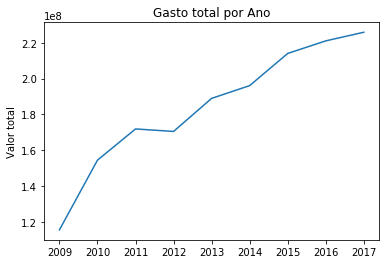

In [29]:
total_ano.plot()
plt.title('Gasto total por Ano')
plt.ylabel('Valor total');
plt.xlabel('');

In [30]:
dif_ano = ((total_ano[2017] - total_ano[2009]) * 100) / total_ano[2009]

In [31]:
print('Podemos observar no grático um constante crescimento no valor total gasto por ano, uma diferença de {:.2f}% entre 2009 e 2017'
     .format(dif_ano))

Podemos observar no grático um constante crescimento no valor total gasto por ano, uma diferença de 95.75% entre 2009 e 2017


In [32]:
# Analizando sazonalidade

total_mes = df_cotas.groupby('numMes')['numMes'].count()

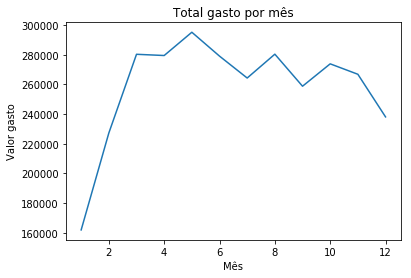

In [33]:
# Plotando gráfico para analisar as informações

plt.plot(total_mes)
plt.title('Total gasto por mês')
plt.xlabel('Mês')
plt.ylabel('Valor gasto');

Podemos observar a existência de uma [sazonalidade](https://www.significados.com.br/sazonal/) nos meses inicias e finais de ano.

Segundo o [site da Câmara dos Deputados](http://www2.camara.leg.br/comunicacao/assessoria-de-imprensa/recesso-dos-deputados): __Recesso dos Deputados:__ O número de dias de recesso parlamentar é de cerca de 50 dias. A sessão legislativa é realizada de 2 de fevereiro a 17 de julho e de 1º de agosto a 22 de dezembro (art. 57 da Constituição Federal).

### b. Quais foram os parlamentares que mais consumiram recursos durante o mandato 2011-2014?
- E quais foram os que menos consumiram recursos?

Definindo o ano de inicio e fim de mandato, para alterar o periodo de mandato a analisar, basta atualizar estes valores

In [34]:
inicio = 2011
fim = 2014

In [35]:
df_mandato = df_cotas[(df_cotas['numAno'] >= inicio) & (df_cotas['numAno'] <= fim)]

In [36]:
df_mandato.head()

,txNomeParlamentar,sgUF,sgPartido,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,numDia,vlrLiquido,numMes,numAno,txtPassageiro,txtTrecho
606018,ABELARDO CAMARINHA,SP,PSB,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,ANDRADE E URIAS LTDA,20.0,50.00,6,2011,NaN,NaN
606019,ABELARDO CAMARINHA,SP,PSB,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,AUTO POSTO ESMERALDA,25.0,4500.00,1,2011,NaN,NaN
606020,ABELARDO CAMARINHA,SP,PSB,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,AUTO POSTO 109 NORTE LTDA,4.0,50.00,7,2011,NaN,NaN
606021,ABELARDO CAMARINHA,SP,PSB,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,AUTO POSTO AEROPORTO LTDA,2.0,85.01,7,2011,NaN,NaN
606022,ABELARDO CAMARINHA,SP,PSB,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,AUTO POSTO AEROPORTO LTDA,16.0,71.00,6,2011,NaN,NaN


In [37]:
print('Apresentando os 10 candidatos que tiveram o maior gasto durante o mandato:')
df_mandato.groupby('txNomeParlamentar')['vlrLiquido'].sum().sort_values(ascending=False)[:10]

Apresentando os 10 candidatos que tiveram o maior gasto durante o mandato:


txNomeParlamentar
EDIO LOPES               1768300.45
JHONATAN DE JESUS        1755418.47
MOREIRA MENDES           1734656.09
PERPÉTUA ALMEIDA         1733755.51
PAULO CESAR QUARTIERO    1729754.83
SILAS CÂMARA             1720887.84
RAUL LIMA                1707777.32
EVANDRO MILHOMEN         1705871.91
GLADSON CAMELI           1693969.07
SEBASTIÃO BALA ROCHA     1692725.70
Name: vlrLiquido, dtype: float64

In [38]:
print('Apresentando os 10 candidatos que tiveram o menor gasto durante o mandato:')
menos_gastos = df_mandato.groupby('txNomeParlamentar')['vlrLiquido'].sum().sort_values(ascending=True)[:10]
menos_gastos

Apresentando os 10 candidatos que tiveram o menor gasto durante o mandato:


txNomeParlamentar
FREIRE JÚNIOR         -1130.82
FRANCISCO RODRIGUES    -892.35
RICARDO BARROS         -742.46
JHC                    -677.55
AYRTON XEREZ           -234.34
BALEIA ROSSI            -25.73
AGNALDO MUNIZ            42.04
CASSIO TANIGUCHI        157.89
ANTONIO PALOCCI         343.68
JULIO SEMEGHINI         429.44
Name: vlrLiquido, dtype: float64

Podemos observar alguns valores negativos, vamos conferir estes casos.

In [39]:
negativo = menos_gastos[menos_gastos < 0]
df_mandato[(df_mandato['txNomeParlamentar'].isin(negativo.index)) & (df_mandato['vlrLiquido'] < 0)]

,txNomeParlamentar,sgUF,sgPartido,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,numDia,vlrLiquido,numMes,numAno,txtPassageiro,txtTrecho
738983,FRANCISCO RODRIGUES,RR,DEM,Emissão Bilhete Aéreo,0,NaN,Cia Aérea - GOL,1.0,-1348.62,1,2011,FRANCISCO RODRIGUES,CANCELADO
918571,RICARDO BARROS,PR,PP,Emissão Bilhete Aéreo,0,NaN,Cia Aérea - GOL,1.0,-580.00,1,2011,RICARDO BARROS,CANCELADO
918572,RICARDO BARROS,PR,PP,Emissão Bilhete Aéreo,0,NaN,Cia Aérea - GOL,1.0,-518.62,1,2011,RICARDO BARROS,CANCELADO
1029699,AYRTON XEREZ,RJ,DEM,Emissão Bilhete Aéreo,0,NaN,Cia Aérea - TAM,23.0,-234.34,10,2012,AYRTON XEREZ,BSB/BSB
1107186,FREIRE JÚNIOR,TO,MDB,Emissão Bilhete Aéreo,0,NaN,Cia Aérea - TAM,23.0,-1130.82,10,2012,FREIRE JÚNIOR,BSB/BSB
1739063,BALEIA ROSSI,SP,MDB,Emissão Bilhete Aéreo,0,NaN,Cia Aérea - PASSAREDO,15.0,-25.73,3,2014,BALEIA ROSSI,BSB/RAO
1845594,JHC,AL,PSB,Emissão Bilhete Aéreo,0,NaN,Cia Aérea - TAM,22.0,-677.55,1,2014,JHC,SDU/BSB


Temos registros de passagens areas canceladas e que foram lançadas com valor negativo, algumas marcadas como _CANCELADO_ em __txtTrecho__ e outras não, o que não nos permite ter uma ideia exata do porque dos valores negativos nestas linhas

### c. Quais são as categorias de despesas mais onerosas dentre os recursos destinados às cotas parlamentares?

In [40]:
categorias = df_mandato.groupby('txtDescricao')['vlrLiquido'].sum()

Para facilitar a visualização, iremos converter os valores para inteiro

In [41]:
categorias = categorias.astype(int)

In [42]:
categorias.sort_values(ascending=False)

txtDescricao
Emissão Bilhete Aéreo                                           152828982
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.                            146196853
TELEFONIA                                                        82038601
MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR        70815868
LOCAÇÃO DE VEÍCULOS AUTOMOTORES OU FRETAMENTO DE EMBARCAÇÕES     65527839
COMBUSTÍVEIS E LUBRIFICANTES.                                    63972452
CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.                    63878042
SERVIÇOS POSTAIS                                                 21232845
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES                    18270282
PASSAGENS AÉREAS                                                 15693136
HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.            7368551
FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR                        6686366
LOCAÇÃO OU FRETAMENTO DE AERONAVES                                5890628
SERVIÇO DE SEGURANÇA PRES

Podemos ver que as categorias mais onerosas são __Emissão Bilhete Aéreo__ e __DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR__

### d. Qual é o custo per capita de um parlamentar em cada unidade da federação? (considerando somente as despesas de cota parlamentar)

Para realizar o calculo do curso per capita em cada unidade da federação, iremos utilizar uma base de dados obitida no site do [IBGE](https://www.ibge.gov.br/estatisticas-novoportal/sociais/populacao/9103-estimativas-de-populacao.html?edicao=16985&t=resultados)

In [43]:
colunas = ['sgUF','codUF','codMUN','MUN','POP']
df_pop = pd.read_csv('pop_brasil.csv', sep=';', encoding='cp1252')
df_pop.columns = colunas
df_pop.head()

,sgUF,codUF,codMUN,MUN,POP
0,RO,11,15,Alta Floresta D'Oeste,25.437
1,RO,11,23,Ariquemes,107.345
2,RO,11,31,Cabixi,6.224
3,RO,11,49,Cacoal,88.507
4,RO,11,56,Cerejeiras,17.934


In [44]:
# Limpando os dados para conversão da coluna POP para inteiro
pop = df_pop['POP']
pop = pop.str.replace(' ','')
pop = pop.str.replace('.','')
pop = pop.str.replace(',00','')
pop = pop.astype(int)

In [45]:
# Atualizando a coluna POP
df_pop['POP'] = pop

In [46]:
# Criando um df com o total de população por UF
df_pop_total = pd.DataFrame(df_pop.groupby('sgUF')['POP'].sum())

In [47]:
# Criando um DF com o total de gastos por UF
df_cotas_uf = pd.DataFrame(df_cotas.groupby('sgUF')['vlrLiquido'].sum().astype(int))

In [48]:
# Incluindo as informações do df de população ao df de cotas
df_cotas_uf = df_cotas_uf.merge(df_pop_total, on='sgUF')

In [49]:
# Criando a coluna com o valor perCapita (dividindo o valor total pelo total da população por UF)
df_cotas_uf['perCapita'] = df_cotas_uf['vlrLiquido'] / df_cotas_uf['POP']

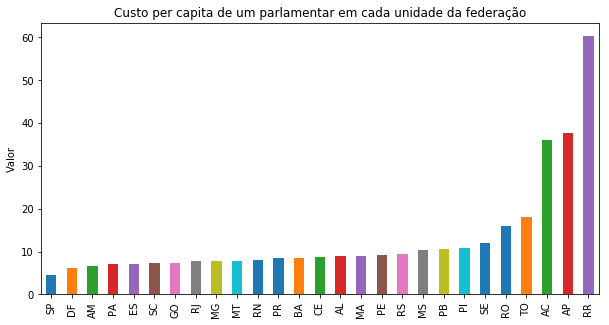

In [50]:
df_cotas_uf['perCapita'].sort_values().plot(kind='bar', figsize=(10,5))
plt.title('Custo per capita de um parlamentar em cada unidade da federação')
plt.xlabel('')
plt.ylabel('Valor');

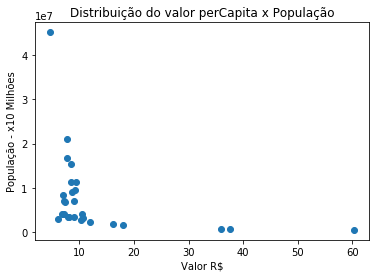

In [51]:
plt.scatter(df_cotas_uf['perCapita'],df_cotas_uf['POP'])
plt.title('Distribuição do valor perCapita x População')
plt.xlabel('Valor R$')
plt.ylabel('População - x10 Milhões');

Pelo gráfico de destribuição podemos verificar uma relação entre o _Total da População_ e o _Custo Per Capita_, pois __as cidades com maiores valores de custo possuem uma população menor__.

### Outras analises

In [52]:
df_cotas.head()

,txNomeParlamentar,sgUF,sgPartido,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,numDia,vlrLiquido,numMes,numAno,txtPassageiro,txtTrecho
0,ABELARDO CAMARINHA,SP,PSB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,TIM CELULAR S/A,19.0,411.51,5,2009,NaN,NaN
1,ABELARDO CAMARINHA,SP,PSB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,TIM CELULAR S/A,19.0,429.09,5,2009,NaN,NaN
2,ABELARDO CAMARINHA,SP,PSB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,TIM CELULAR S/A,19.0,109.79,5,2009,NaN,NaN
3,ABELARDO CAMARINHA,SP,PSB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,TIM CELULAR S/A,19.0,68.14,5,2009,NaN,NaN
4,ABELARDO CAMARINHA,SP,PSB,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,AUTO POSTO ALVORADA,25.0,4395.36,9,2009,NaN,NaN


Vamos analisar os registros com maior numero de ocorrencias em cada coluna, utilizando os dados obtidos pelo [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [53]:
df_cotas.describe(include='all')

,txNomeParlamentar,sgUF,sgPartido,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,numDia,vlrLiquido,numMes,numAno,txtPassageiro,txtTrecho
count,3105148,3101362,3101362,3105148,3.105148e+06,651200,3105148,3.060694e+06,3.105148e+06,3.105148e+06,3.105148e+06,818667,832103
unique,1188,27,34,22,NaN,4,194300,NaN,NaN,NaN,NaN,31363,19889
top,VANDERLEI MACRIS,SP,PT,Emissão Bilhete Aéreo,NaN,Veículos Automotores,Cia Aérea - GOL,NaN,NaN,NaN,NaN,FELIPE BORNIER,BSB/BSB
freq,16228,500145,479056,812550,NaN,628615,331210,NaN,NaN,NaN,NaN,4360,116409
mean,NaN,NaN,NaN,NaN,2.305413e-01,NaN,NaN,1.510290e+01,5.339915e+02,6.658805e+00,2.013106e+03,NaN,NaN
std,NaN,NaN,NaN,NaN,5.089532e-01,NaN,NaN,8.893370e+00,1.895129e+03,3.289932e+00,2.515553e+00,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1.000000e+00,-2.097470e+04,1.000000e+00,2.009000e+03,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,7.000000e+00,4.235000e+01,4.000000e+00,2.011000e+03,NaN,NaN
50%,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1.500000e+01,1.260700e+02,7.000000e+00,2.013000e+03,NaN,NaN
75%,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,2.300000e+01,4.386200e+02,1.000000e+01,2.015000e+03,NaN,NaN


In [54]:
# Filtro com os maiores valores indicados pelo describe, para utilizar nas próximas analises

parlamentar = df_cotas['txNomeParlamentar'] == 'VANDERLEI MACRIS'
servico = df_cotas['txtDescricao'] == 'Emissão Bilhete Aéreo'
fornecedor = df_cotas['txtFornecedor'] == 'Cia Aérea - GOL'
passageiro = df_cotas['txtPassageiro'] == 'FELIPE BORNIER'
uf = df_cotas['sgUF'] == 'SP'
partido = df_cotas['sgPartido'] == 'PT'

In [55]:
def plotar(filtro):
    """
    Função para plotar um gráfico
    Paramentros:
    filtro - variavel que possui filtro que será aplicado ao gráfico
    retorna:
    Plota um gráfico de linhas após aplicar o filtro, agrupar os dados por ano e somar os valores.
    """
    return df_cotas[filtro].groupby('numAno')['vlrLiquido'].sum().plot()

In [56]:
# Dados para descrição
def descreve(filtro):
    """
    Função para descrever os dados apresentados no gráfico
    Paramentros:
    filtro - variavel que possui filtro que será aplicado ao gráfico
    retorna:
    Texto descrevendo as informações apresentadas no gráfico    
    """
    valor_min = df_cotas[filtro].groupby('numAno')['vlrLiquido'].sum().min()
    vmin_ano = df_cotas[filtro].groupby('numAno')['vlrLiquido'].sum().idxmin()
    valor_max = df_cotas[filtro].groupby('numAno')['vlrLiquido'].sum().max()
    vmax_ano = df_cotas[filtro].groupby('numAno')['vlrLiquido'].sum().idxmax()
    valor_varia = ((valor_max - valor_min) / valor_min) * 100
    print('Teve uma variação de {:.2f}% entre os anos de {} e {}, partindo de um gasto de R$ {:.2f} para R$ {:.2f}'
         .format(valor_varia,vmin_ano,vmax_ano,valor_min,valor_max))    

### Parlamentar
Podemos observar que __VANDERLEI MACRIS__ possui o maior numero de ocorrencias em nosso df, vamos analisar seus gastos.

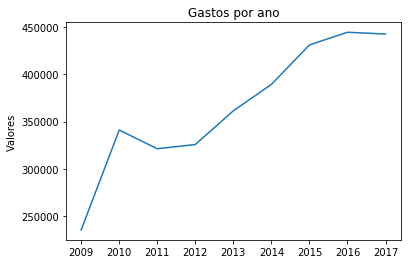

In [57]:
# Plotando um gráfico para acompanhar a evolução dos gastos do parlamentar

plotar(parlamentar)
plt.title('Gastos por ano')
plt.xlabel('')
plt.ylabel('Valores');

In [58]:
descreve(parlamentar)

Teve uma variação de 88.85% entre os anos de 2009 e 2016, partindo de um gasto de R$ 235376.61 para R$ 444513.56


### Serviço
O serviço apontado pelo describe como o de maior ocorrência foi o de __Emissão Bilhete Aéreo__, vamos ver a evolução de gastos com esse serviço.

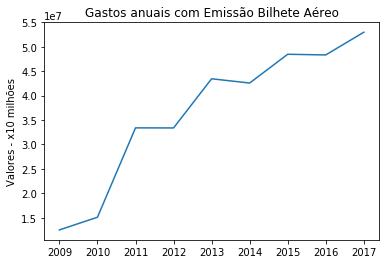

In [59]:
# Plotando um gráfico com a evolução de gastos por anos
plotar(servico)
plt.title('Gastos anuais com Emissão Bilhete Aéreo')
plt.xlabel('')
plt.ylabel('Valores - x10 milhões');

In [60]:
descreve(servico)

Teve uma variação de 323.89% entre os anos de 2009 e 2017, partindo de um gasto de R$ 12500190.87 para R$ 52987050.45


### Fornecedor
O fornecedor com mais registros no df é __Cia Aérea - GOL'__

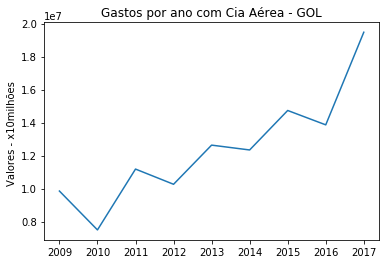

In [61]:
# Plotando um gráfico com os gastos por ano
plotar(fornecedor)
plt.title('Gastos por ano com Cia Aérea - GOL')
plt.xlabel('')
plt.ylabel('Valores - x10milhões ');

In [62]:
descreve(fornecedor)

Teve uma variação de 159.95% entre os anos de 2010 e 2017, partindo de um gasto de R$ 7490509.57 para R$ 19471698.67


### Passageiro
Quem mais possui registros como _passageiro_ é __FELIPE BORNIER__.

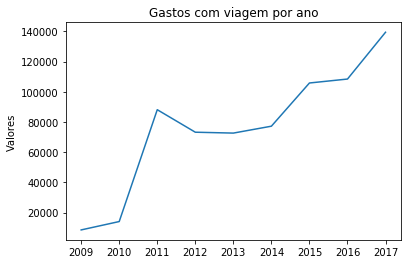

In [63]:
# Plotando um gráfico de seus gastos com viagem por ano
plotar(passageiro)
plt.title('Gastos com viagem por ano')
plt.xlabel('')
plt.ylabel('Valores');

In [64]:
descreve(passageiro)

Teve uma variação de 1538.54% entre os anos de 2009 e 2017, partindo de um gasto de R$ 8510.41 para R$ 139446.57


## UF - Estado que mais registrou gastos
Segundo nosso describe o estado que teve mais gastos registrados foi SP

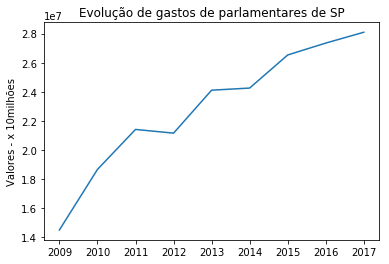

In [65]:
plotar(uf)
plt.title('Evolução de gastos de parlamentares de SP')
plt.xlabel('')
plt.ylabel('Valores - x 10milhões');

In [66]:
descreve(uf)

Teve uma variação de 93.52% entre os anos de 2009 e 2017, partindo de um gasto de R$ 14516008.58 para R$ 28090826.16


### Partido
Nossos dados apontam que o __PT__ é partido que mais tem registros

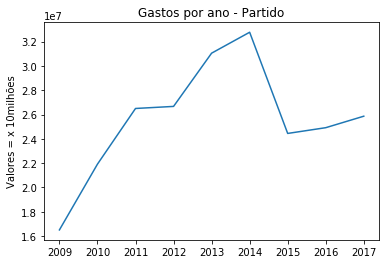

In [67]:
# Plotando gráfico de gastos ano do partido
plotar(partido)
plt.title('Gastos por ano - Partido')
plt.xlabel('')
plt.ylabel('Valores = x 10milhões');

In [68]:
descreve(partido)

Teve uma variação de 98.52% entre os anos de 2009 e 2014, partindo de um gasto de R$ 16506446.71 para R$ 32768728.94


Podemos observar uma grande queda de 2014 para 2015, mas não possuimos informações que possam apontar o motivo dessa mudança.

## Conclusão

Como podemos observar nos dados e gráficos apresentados, os gastos da Câmara dos Deputados em todos os pontos de vista apenas cresce, uma diferença de 95.75% entre 2009 e 2017, e segundo o [Wikipedia](https://pt.wikipedia.org/wiki/N%C3%BAmero_de_parlamentares_do_Brasil_por_ano_de_elei%C3%A7%C3%A3o) o número de deputados se mantêm em 513 desde 1994, o que mostra que o número de deputados não esta relacionado aos gastos

### Limitações

__Tipagem das colunas__

Ao analisar a tipagem das colunas, observamos que __datEmissao__ não estava no formato _datetime_ e portanto e a coluna __vlrLiquido__ não estava no formato _float_.

Providências:
- datEmissao : convertemos a coluna a coluna para DIA e a renomeamos para numDia
- vlrLiquido : convertemos para float


__Valor nulos__

Identificamos valores nulos nas colunas: _sgUF, sgPartido, txtDescricaoEspecificacao, numDia, txtPassageiro e txtTrecho._

As colunas foram analisadas e nenhuma delas apresentou a necessidade de alteração por não interferir em nossas analises.

Fabiano Lima - 08/12/2018